In [1]:
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers, callbacks

import matplotlib.pyplot as plt

from sklearn import metrics

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
# Split the training and validation sets
df_train = data.sample(frac=0.7, random_state=11)
df_valid = data.drop(df_train.index)

# Scaling [0 - 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

scaled_train = (df_train - min_) / (max_ - min_)
scaled_valid = (df_valid - min_) / (max_ - min_)

scaled_train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1429,0.292035,0.041096,0.40,0.089041,0.061770,0.521127,0.215548,0.435389,0.464567,0.359281,0.446154,0.4
260,0.292035,0.143836,0.23,0.054795,0.108514,0.239437,0.137809,0.453744,0.433071,0.191617,0.138462,0.4
916,0.061947,0.407534,0.19,0.041096,0.248748,0.084507,0.197880,0.284875,0.692913,0.167665,0.400000,0.4


In [4]:
# Scaled features and target
X_train = scaled_train.drop('quality', axis=1)
X_valid = scaled_valid.drop('quality', axis=1)

y_train = scaled_train.quality
y_valid = scaled_valid.quality

## The Neural Network
+ Dropout and BatchNorm

In [5]:
model = keras.Sequential([
    layers.Dense(1024, activation = 'relu', input_shape = [11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation = 'relu'),
    layers.Dense(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation = 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1)
])

In [6]:
model.compile(optimizer = 'adam', loss = 'mae')

In [7]:
early_stopping = callbacks.EarlyStopping(
        min_delta = 0.001,
        patience = 20,
        restore_best_weights = True
)

In [8]:
model_data = model.fit(X_train, y_train,
                      validation_data = (X_valid, y_valid),
                      batch_size = 128,
                      epochs = 300,
                      callbacks = [early_stopping])

Epoch 1/300
9/9 [==============================] - 1s 121ms/step - loss: 0.3576 - val_loss: 0.1448
Epoch 2/300
9/9 [==============================] - 0s 44ms/step - loss: 0.1594 - val_loss: 0.1753
Epoch 3/300
9/9 [==============================] - 0s 46ms/step - loss: 0.1398 - val_loss: 0.1438
Epoch 4/300
9/9 [==============================] - 0s 47ms/step - loss: 0.1422 - val_loss: 0.1455
Epoch 5/300
9/9 [==============================] - 1s 59ms/step - loss: 0.1436 - val_loss: 0.1451
Epoch 6/300
9/9 [==============================] - 0s 44ms/step - loss: 0.1411 - val_loss: 0.1422
Epoch 7/300
9/9 [==============================] - 0s 48ms/step - loss: 0.1351 - val_loss: 0.1387
Epoch 8/300
9/9 [==============================] - 0s 49ms/step - loss: 0.1295 - val_loss: 0.1389
Epoch 9/300
9/9 [==============================] - 1s 58ms/step - loss: 0.1309 - val_loss: 0.1383
Epoch 10/300
9/9 [==============================] - 1s 62ms/step - loss: 0.1297 - val_loss: 0.1383
Epoch 11/300
9/9 [

In [9]:
df_hist = pd.DataFrame(model_data.history)
df_hist.head()

,loss,val_loss
0,0.357624,0.144822
1,0.159429,0.175322
2,0.139828,0.143757
3,0.142172,0.145505
4,0.143608,0.145114


<AxesSubplot:>

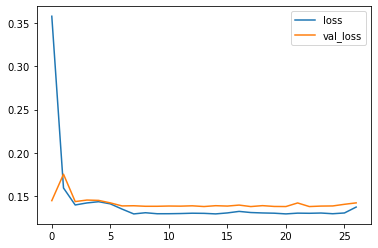

In [10]:
df_hist.plot()

In [11]:
print(f'Min Val_loss: {df_hist.val_loss.min()}')

Min Val_loss: 0.13799507915973663


In [12]:
preds = model.predict(X_valid)
mae = metrics.mean_absolute_error(preds, y_valid)
print('MAE: ', mae)

MAE:  0.13873315493265792
